<a href="https://colab.research.google.com/github/poposca/100GamingAgent/blob/main/NixonP_Assigment_6_CNN_and_architectures_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6: Convolutional Neural Networks and Architectures

This assignment is designed in order to train you for the exam. Then, I will suggest you to do this steo by step. 

To start building a Convolutional Neural Network, we need to make sure we have all the elements:
1. Dataset
2. Task to solve (classification, detection, segmentation, etc)
3. An architecture
4. Metrics to prove your network

### Questions:
1. Then, I want you to describe in your own words the definition of a **dataset** and how to feed a convolutional Neural network with it?

- A dataset is a collection of labeled data that can be used to feed and train a machine learning model. In the case of CNN, the images need to match the number of channels of the first filters of the network. Then, they can be fed to the network through iteration. This process is normaly done with the help of a data loader function or object.

Here is your first coding task. You will be working with the following dataset [AVP](https://www.kaggle.com/pmigdal/alien-vs-predator-images). Then, in order to use this dataset in PyTorch you will have to create your own Dataset class in the code and then use DataLoaders to feed the network. Then, these are the links you need to:
1. Create your [dataset class, and loader.](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) 
2. To preprocess your dataset you will need to use [transforms](https://pytorch.org/vision/stable/transforms.html).


In [ ]:
import gc
gc.enable()

In [1]:
'''
This is just an example of what you need to implement in your work

First the Dataset class to manage your dataset
'''

import os
import torchvision
from torchvision.io import read_image
from torch.utils.data import Dataset
from torchvision.transforms import Grayscale

class AVPImageDataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None, train=True):
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.train = train

    def __len__(self):
        if self.train is True:
          return 694
        else:
          return 200

    def __getitem__(self, idx):
        if self.train is True:
          if 0 <= idx < 347:
            file_name = str(idx) + ".jpg"
            img_path = os.path.join(self.img_dir, "train", "alien", file_name)
            label = 0
          elif 347 <= idx < 694:
            file_name = str(idx - 347) + ".jpg"
            img_path = os.path.join(self.img_dir, "train", "predator", file_name)
            label = 1
        if self.train is False:
          if 0 <= idx < 100:
            file_name = str(idx) + ".jpg"
            img_path = os.path.join(self.img_dir, "validation", "alien", file_name)
            label = 0
          elif 100 <= idx < 200:
            file_name = str(idx - 100) + ".jpg"
            img_path = os.path.join(self.img_dir, "validation", "predator", file_name)
            label = 1
        image = read_image(img_path)
        if self.transform:
            #print(image.float())
            if image.shape[0] == 3:
              t = torchvision.transforms.Compose([Grayscale(),])
              image = t(image)
            image = self.transform(image.float())
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
training_data = AVPImageDataset("/content/drive/MyDrive/avp_data", transform=mytransform, train=True)
test_data = AVPImageDataset("/content/drive/MyDrive/avp_data", transform=mytransform, train=False)

In [6]:
'''
Now you have to be able to iter your data with a loader
'''

from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=8, shuffle=True)

In [4]:
'''
Sometimes your data will need to be preprocessed to use it
Then use transforms from torch vision where you can mix Torchvision functions and PIL functions
'''
import torch
torch.manual_seed(17)

from torchvision.transforms import CenterCrop, Resize, ToTensor, Normalize, Compose, RandomHorizontalFlip #, RandomPerspective, RandomRotation

transforms = torch.nn.Sequential(
    CenterCrop(200),
    Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
)
scripted_transforms = torch.jit.script(transforms)

'''
You can use composition of transforms too
'''
mytransform = Compose([
    Resize((192, 192)),
    RandomHorizontalFlip(),     #Soft Data Augmentation
    Normalize((0.5,), (0.5,))
    #RandomPerspective(distortion_scale=0.1, p=0.3, fill=0.5),
    #RandomRotation(5, fill=0.5)
  ])

### Test Image and Label

Feature batch shape: torch.Size([8, 1, 192, 192])
Labels batch shape: torch.Size([8])


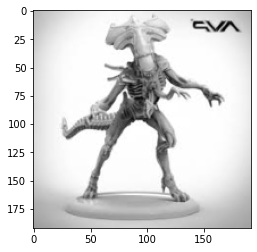

Label: 0


In [ ]:
import matplotlib.pyplot as plt

# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

### Questions: Dataset and inputs

1. Which feature of the images do you think is the most complicated to classify?
2. Will you treat the data in gray scale or color images? Why? And what do you expect as a result?
3. There are just two classes, then which loss funtion would do a better work? and why?
4. Which optimizer will you use? and why?
5. How will you set the best learning rate?
5. How will you evaluate your model?

### Answers

1. The foreheads of aliens and predators which are very similar.
2. Gray Scale, because the color does not place a role to distinguish between aliens and predators. In fact, the color on those images just represents lighting conditions.
3. Binary Cross Entropy, because it allows to seed up the learning process which is necessary with such a small dataset.
4. Stochastic gradient descent, because it can be configured in a way that performs better than other optimizers like Adam-.
5. I will use a Decaying learning rate that gets multiplied by a factor of 0.1 every 4 epochs.
6. The evalutation will be based on accuracy.

## CNN Model and architecture

Now we have to define a model, a convolutional neural network this mean. you should use convolutional layers, fully connected layers for classification and any additoonal layer for optimize the training. 

To define your model you can sue the following tutorials:
1. [CIFAR10](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)
2. [NN.module](https://pytorch.org/tutorials/recipes/recipes/defining_a_neural_network.html)

The thing is that you cannot use transfer learning or implementations of famous CNN model. You have to create your own. And there will be 1 point in the exam for the one with the best accuaracy model in evaluation stage.


### NXNET

In [16]:
'''
Here is an example using nn.Module
'''
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.conv1 = nn.Conv2d(1, 32, 3, stride=1, padding=1, padding_mode='replicate')
      self.conv2 = nn.Conv2d(32, 64, 3, stride=1, padding=1, padding_mode='circular')
      self.conv3 = nn.Conv2d(64, 128, 3, stride=1, padding=1, padding_mode='zeros')
      self.pool = nn.AvgPool2d(2, 2)
      self.dropout1 = nn.Dropout2d(0.25)
      self.dropout2 = nn.Dropout2d(0.5)
      self.fc1 = nn.Linear(128 * 96 * 96, 320)    # --->OJO<---
      self.fc2 = nn.Linear(320, 160)
      self.fc3 = nn.Linear(160,80)
      self.fc4 = nn.Linear(80, 1)
      self.m = nn.Sigmoid()
      self.norm1 = m = nn.InstanceNorm2d(32, affine=True)
      self.norm2 = m = nn.InstanceNorm2d(64, affine=True)
      self.norm3 = m = nn.InstanceNorm2d(128, affine=True)

    def forward(self, x):
      x = self.norm1(self.conv1(x))
      x = F.relu(x)
      x = self.norm2(self.conv2(x))
      x = F.relu(x)
      x = self.norm3(self.conv3(x))
      x = F.relu(x)

      x = self.pool(x)
      #x = self.dropout1(x)
      
      x = torch.flatten(x, 1)
      x = self.fc1(x)
      x = F.relu(x)
      #x = self.dropout2(x)
      x = F.relu(self.fc2(x))
      x = F.relu(self.fc3(x))
      x = self.fc4(x)

      output = self.m(x)
      return output

net = Net()

In [17]:
random_data = torch.rand((1, 1, 192, 192))

result = net(random_data)
print (result)


tensor([[0.4908]], grad_fn=<SigmoidBackward>)


### Optimizer and Loss

In [18]:
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.ASGD(net.parameters(), lr=0.001)

In [19]:
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, [4,], 0.1, verbose = True )

Adjusting learning rate of group 0 to 1.0000e-03.


### Training

In [20]:
for epoch in range(6):

    running_loss = 0.0

    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        optimizer.zero_grad()

        labels = labels.view(-1,1)
        target = labels.float()

        outputs = net(inputs)

        #print("labels: ", target)
        #print("outputs: ", outputs)

        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        #print("t_loss = ", loss.item() )

        running_loss += loss.item()
        if i % 20 == 19:    # print every 20 mini-batches
           
            print('[%d, %5d] loss: %.4f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

    scheduler.step()

print('Finished Training')

[1,    20] loss: 0.6935
[1,    40] loss: 0.6923
[1,    60] loss: 0.6888
[1,    80] loss: 0.6836
Adjusting learning rate of group 0 to 1.0000e-03.
[2,    20] loss: 0.6696
[2,    40] loss: 0.6518
[2,    60] loss: 0.6668
[2,    80] loss: 0.6464
Adjusting learning rate of group 0 to 1.0000e-03.
[3,    20] loss: 0.6166
[3,    40] loss: 0.6624
[3,    60] loss: 0.6261
[3,    80] loss: 0.5958
Adjusting learning rate of group 0 to 1.0000e-03.
[4,    20] loss: 0.5843
[4,    40] loss: 0.5690
[4,    60] loss: 0.6157
[4,    80] loss: 0.5705
Adjusting learning rate of group 0 to 1.0000e-04.
[5,    20] loss: 0.5259
[5,    40] loss: 0.5247
[5,    60] loss: 0.5271
[5,    80] loss: 0.4773
Adjusting learning rate of group 0 to 1.0000e-04.
[6,    20] loss: 0.4944
[6,    40] loss: 0.4761
[6,    60] loss: 0.5087
[6,    80] loss: 0.5429
Adjusting learning rate of group 0 to 1.0000e-04.
Finished Training


In [21]:
PATH3 = './NXNET3.pth'
torch.save(net.state_dict(), PATH3)

### Questions: Models and architecture

1. Why is better to use a convolutional layer over a fully connected one to extract features from an image?
2. How a convolution works? And which operations represent the convolution?
3. How do you calculate de size of the feature maps and inputs in a convolutional layer? 
4. Principal differences between lienar classifiers and convolutional networks?


1. Because it preserves in some way the structure of the image, so the inferences are done according to the pixels and their positions.
2. The convolution uses a kernel that extracts a feature of the image. This is done through dot products of two matrices of the size of the kernel.
3. The height and width of the feautre map is equal to the those charasteristics from the input minus those from the kernel plus two times the padding, all of that divided by the stride size, and all of that plus one.
4. Convolutional networks can perform non-linear classifications.

## Test your model
In order to test your model you should use at least a validation dataset and (optional) test dataset. Here is an example on how to train with a [validation dataset.](https://www.geeksforgeeks.org/training-neural-networks-with-validation-using-pytorch/)



In [12]:
classes = ('alien', 'predator')

In [22]:
net = Net()
net.load_state_dict(torch.load(PATH3))

<All keys matched successfully>

In [ ]:
dataiter = iter(test_dataloader)
images, labels = dataiter.next()


In [ ]:
outputs = net(images)
print(outputs)

tensor([[0.5383],
        [0.6810],
        [0.6162],
        [0.7169],
        [0.8662],
        [0.3452],
        [0.5847],
        [0.2922]], grad_fn=<SigmoidBackward>)


In [ ]:
predicted = [1 if x>0.5 else 0 for x in outputs]

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(8)))

Predicted:  predator predator predator predator predator alien predator alien


### Accuracy measurement

In [24]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        outputs = net(images)
        predicted = torch.Tensor([1 if x>0.5 else 0 for x in outputs])
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 100 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 100 test images: 73 %


### Question: Evaluation
1. Why do we use a validation dataset?
2. What is overfiiting?
3. What is underfitting?


1. To test if the model can adapt to data that it has never seen before, and modifying the hiperparameters of the network accordingly.
2. When the model performs to well with the training data but poorly with new data.
3. When the model has not learned enough from the training data.

Submit your notebook :D and good luck in your exam